In [54]:
#First logistic regression
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [28]:
#importing the data
raw_data=pd.read_csv('Example_Bank_data.csv')

In [30]:
raw_data

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no
...,...,...,...
513,513,204,no
514,514,806,yes
515,515,290,no
516,516,473,yes


In [32]:
data=raw_data.copy()

In [34]:
data

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no
...,...,...,...
513,513,204,no
514,514,806,yes
515,515,290,no
516,516,473,yes


In [36]:
#Cleaning data and making dummies
data['y']=data['y'].map({'yes':1,'no':0})
data=data.drop(['Unnamed: 0'],axis=1)

In [38]:
data

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0
...,...,...
513,204,0
514,806,1
515,290,0
516,473,1


In [42]:
#statistics of the data
data.describe(include='all')

,duration,y
count,518.000000,518.000000
mean,382.177606,0.500000
std,344.295990,0.500483
min,9.000000,0.000000
25%,155.000000,0.000000
50%,266.500000,0.500000
75%,482.750000,1.000000
max,2653.000000,1.000000


In [46]:
#building the logistic regression model
y=data['y']
x1=data['duration']
x=sm.add_constant(x1)
model=sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [50]:
#showing summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Oct 2025   Pseudo R-squ.:                  0.2121
Time:                        15:21:57   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

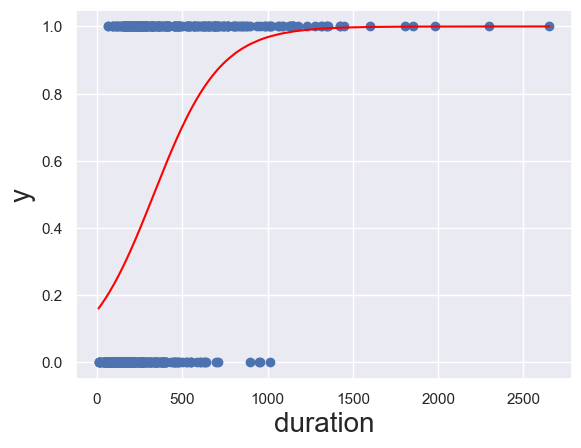

<Figure size 2000x2000 with 0 Axes>

In [64]:
#defining the logistic regression function
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,model.params[0],model.params[1]))
x_sorted = np.sort(np.array(x1))
ax = plt.scatter(x1,y,color='C0')
plt.xlabel('duration', fontsize = 20)
plt.ylabel('y', fontsize = 20)
# Plotting the curve
ax2 = plt.plot(x_sorted,f_sorted,color='red')
plt.figure(figsize=(20,20))
plt.show()